# 科研论文优化
**需要安装三个包，matplotlib、scienceplot、Seaborn，由于Proplot老是跟Matplotlib版本冲突我不使用了**

**具体的虚拟环境各个包的版本**

## Nature绘图风格
首先注意两件事情，1、无论画什么图首先注意轴的比例选择，2、坐标系的选取

###  带统计信息的柱状图
统计信息有很多种，这里面针对单变量和多变量定义的统计信息也很多，要注意选择，比如说针对统计变量P值，在两个变量是分析的是他们的差异性是否显著。

#### **这里是组间P值分析**

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

one_type01 vs. two_type01: t-test independent samples, P_val:8.775e-01 t=1.548e-01
one_type02 vs. two_type02: t-test independent samples, P_val:9.555e-02 t=1.694e+00
two_type01 vs. three_type01: t-test independent samples, P_val:6.710e-01 t=-4.270e-01
two_type02 vs. three_type02: t-test independent samples, P_val:2.752e-01 t=-1.102e+00
one_type01 vs. three_type01: t-test independent samples, P_val:7.861e-01 t=-2.726e-01
one_type02 vs. three_type02: t-test independent samples, P_val:6.095e-01 t=5.136e-01


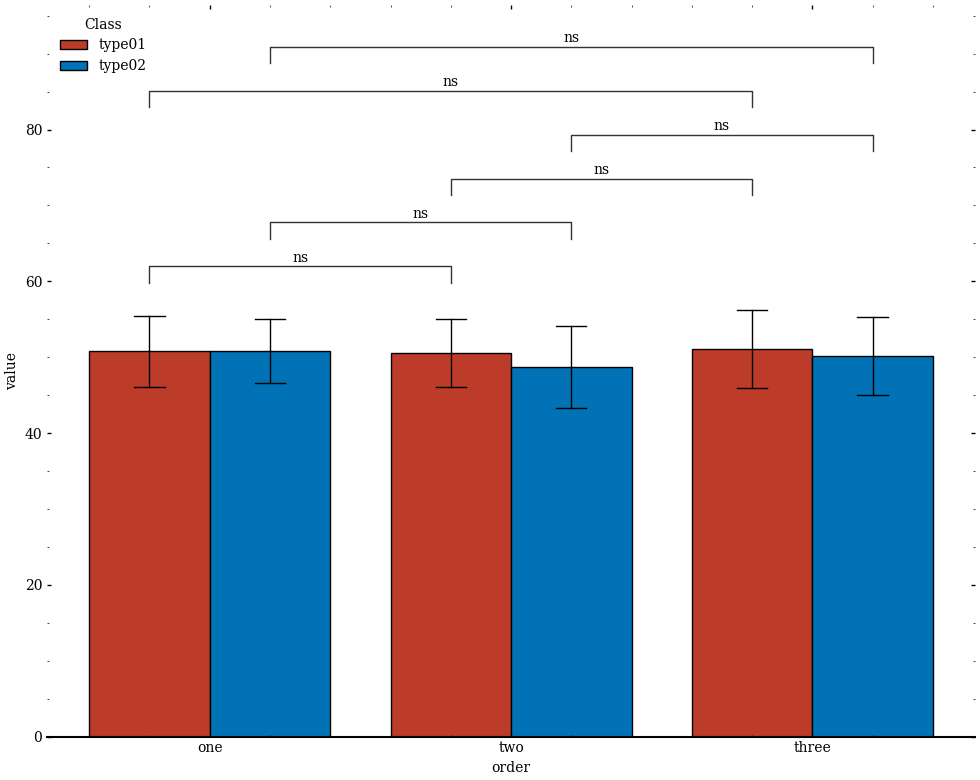

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind
from statannotations.Annotator import Annotator

# 设置随机种子
np.random.seed(10)

# 生成模拟数据
num_entries_per_order = 60
num_entries_per_class = int(num_entries_per_order * 3 / 2)
data = pd.DataFrame({
    'order': np.repeat(['one', 'two', 'three'], num_entries_per_order),
    'class': np.tile(['type01', 'type02'], num_entries_per_class),
    'value': np.random.randn(3 * num_entries_per_order) * 5 + 50
})

# 使用调色板
palette = ["#BC3C29FF", "#0072B5FF"]

# 绘制柱状图
fig, ax = plt.subplots(figsize=(10, 8))
sns.barplot(x='order', y='value', hue='class', data=data, palette=palette, ci='sd',
            capsize=.1, errwidth=1, errcolor="k", saturation=1, edgecolor="k", linewidth=1)

# 计算图形中值的最大点，用于设置Y轴的上限
max_val = data['value'].max()
y_upper_limit = max_val + 10
plt.ylim(0, y_upper_limit)

# 添加P值注释
box_pairs = [
    (("one", "type01"), ("two", "type01")),
    (("one", "type02"), ("two", "type02")),
    (("one", "type01"), ("three", "type01")),
    (("one", "type02"), ("three", "type02")),
    (("two", "type01"), ("three", "type01")),
    (("two", "type02"), ("three", "type02"))
]

annotator = Annotator(ax, pairs=box_pairs, data=data, x='order', y='value', hue='class')
annotator.configure(test='t-test_ind', text_format='star', loc='inside', line_offset_to_group=.01, line_height=0.03, line_width=1)
annotator.apply_and_annotate()

# 修改坐标轴样式
ax.tick_params(which='major', direction='in', length=3, width=1., labelsize=10, bottom=False)
for spine in ["top", "left", "right"]:
    ax.spines[spine].set_visible(False)
ax.spines['bottom'].set_linewidth(1.5)

# 设置图例
ax.legend(title='Class', loc='upper left')

plt.tight_layout()
plt.show()

#### 这里是组间P值分析（一个组一个变量）

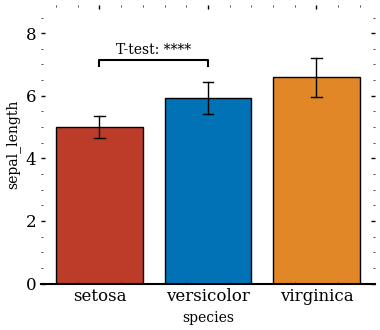

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats

# 加载数据集
iris = sns.load_dataset("iris")
data_p = iris[["sepal_length", "species"]]

# 计算P值
stat, p_value = scipy.stats.ttest_ind(
    data_p[data_p["species"] == "setosa"]["sepal_length"],
    data_p[data_p["species"] == "versicolor"]["sepal_length"],
    equal_var=False
)

# 定义函数进行P值和星号转换
def convert_pvalue_to_asterisks(pvalue):
    if pvalue <= 0.0001:
        return "****"
    elif pvalue <= 0.001:
        return "***"
    elif pvalue <= 0.01:
        return "**"
    elif pvalue <= 0.05:
        return "*"
    return "ns"
p_value_cov = convert_pvalue_to_asterisks(p_value)

# 设置调色板
palette = ["#BC3C29FF", "#0072B5FF", "#E18727FF"]

# 绘制柱状图
fig, ax = plt.subplots(figsize=(4, 3.5), dpi=100, facecolor="w")
sns.barplot(x="species", y="sepal_length", data=iris, palette=palette,
            estimator=np.mean, ci="sd", capsize=.1, errwidth=1, errcolor="k",
            saturation=1, edgecolor="k", linewidth=1)

# 添加P值注释
x1, x2 = 0, 1  # 柱子的位置
y, h = data_p[data_p["species"].isin(["setosa", "versicolor"])].groupby("species").mean().max() + 1, 0.2  # 线的高度位置和额外高度

# 绘制连接线更高
ax.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c="k")  # 绘制连接线
ax.text((x1+x2)*.5, y+h*1.5, f"T-test: {p_value_cov}", ha='center', va='bottom', color="k", fontsize=10)  # 添加P值文本

# 设置图表参数
ax.tick_params(which='major', direction='in', length=3, width=1., labelsize=12, bottom=False)
for spine in ["top", "left", "right"]:
    ax.spines[spine].set_visible(False)
ax.spines['bottom'].set_linewidth(1.5)
ax.set_ylim(0, iris["sepal_length"].max() + 1)  # 设置y轴上限以适应注释

# 显示图形
plt.tight_layout()
plt.show()

# 直方图

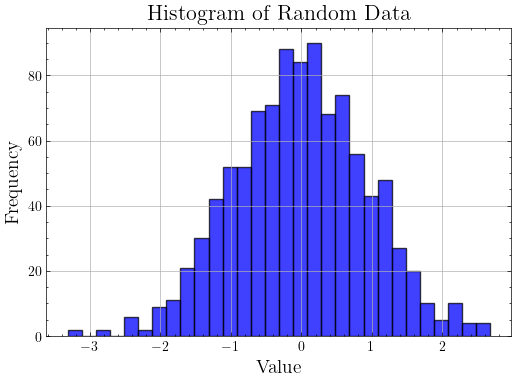

In [39]:
import numpy as np
import matplotlib.pyplot as plt

# 生成随机数据
data = np.random.randn(1000)

# 设置绘图风格
plt.style.use('science')

# 绘制直方图
plt.figure(figsize=(6, 4))
plt.hist(data, bins=30, alpha=0.75, color='blue', edgecolor='black')
plt.title("Histogram of Random Data", fontsize=16, fontfamily='serif')
plt.xlabel("Value", fontsize=14, fontfamily='serif')
plt.ylabel("Frequency", fontsize=14, fontfamily='serif')
plt.grid(True)
plt.show()

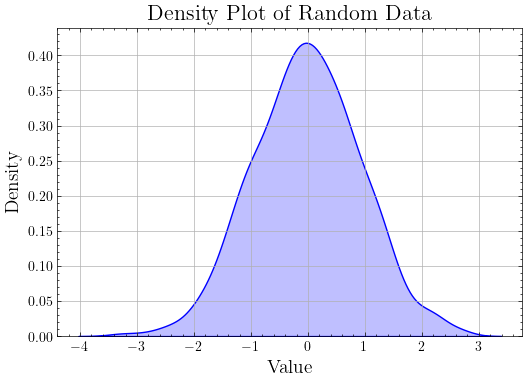

In [40]:
import seaborn as sns

# 设置绘图风格
plt.style.use('science')

# 绘制密度图
plt.figure(figsize=(6, 4))
sns.kdeplot(data, color='blue', fill=True)
plt.title("Density Plot of Random Data", fontsize=16, fontfamily='serif')
plt.xlabel("Value", fontsize=14, fontfamily='serif')
plt.ylabel("Density", fontsize=14, fontfamily='serif')
plt.grid(True)
plt.show()

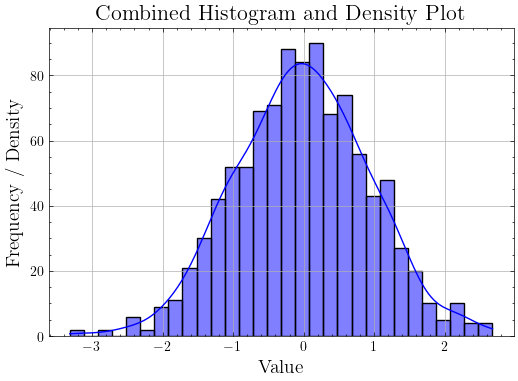

In [41]:
# 设置绘图风格
plt.style.use('science')

# 绘制组合图
plt.figure(figsize=(6, 4))
sns.histplot(data, bins=30, kde=True, color='blue', edgecolor='black')
plt.title("Combined Histogram and Density Plot", fontsize=16, fontfamily='serif')
plt.xlabel("Value", fontsize=14, fontfamily='serif')
plt.ylabel("Frequency / Density", fontsize=14, fontfamily='serif')
plt.grid(True)
plt.show()

# qqpp

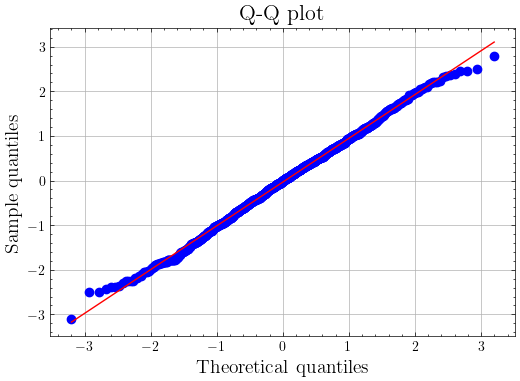

In [42]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# 生成正态分布的随机数据
data = np.random.normal(loc=0, scale=1, size=1000)

# 设置绘图风格
plt.style.use('science')

# 绘制Q-Q图
plt.figure(figsize=(6, 4))
stats.probplot(data, dist="norm", plot=plt)
plt.title('Q-Q plot', fontsize=16, fontfamily='serif')
plt.xlabel('Theoretical quantiles', fontsize=14, fontfamily='serif')
plt.ylabel('Sample quantiles', fontsize=14, fontfamily='serif')
plt.grid(True)
plt.show()

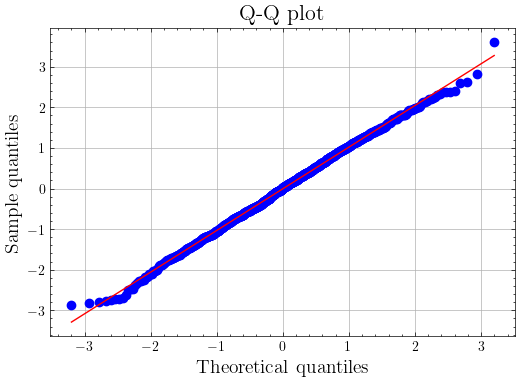

In [43]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# 生成正态分布的随机数据
data = np.random.normal(loc=0, scale=1, size=1000)

# 设置绘图风格
plt.style.use('science')

# 绘制Q-Q图
plt.figure(figsize=(6, 4))
stats.probplot(data, dist="norm", plot=plt)
plt.title('Q-Q plot', fontsize=16, fontfamily='serif')
plt.xlabel('Theoretical quantiles', fontsize=14, fontfamily='serif')
plt.ylabel('Sample quantiles', fontsize=14, fontfamily='serif')
plt.grid(True)
plt.show()

# 经验分布

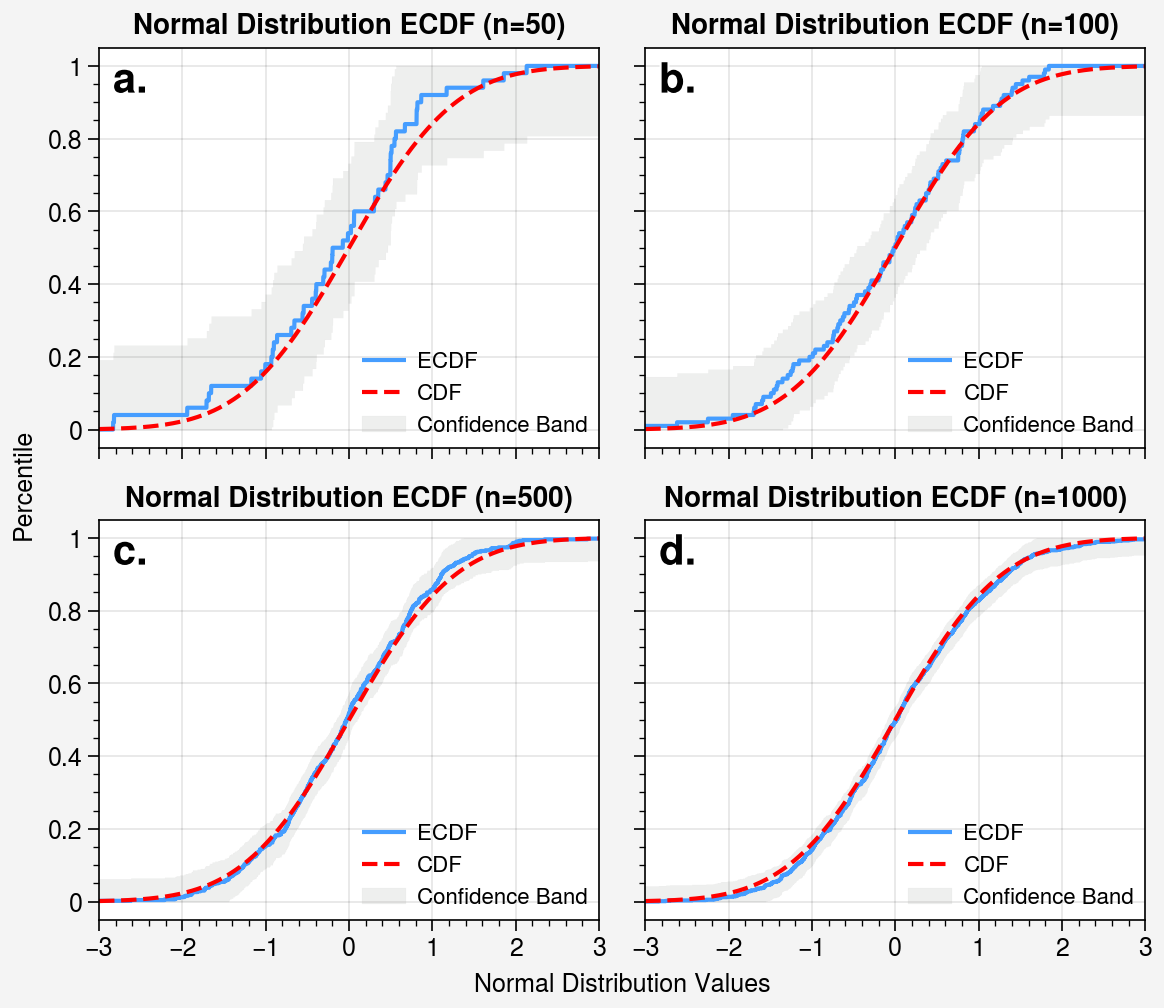

In [46]:
import numpy as np
import pandas as pd
import proplot as pplt
from scipy import stats
from statsmodels.distributions.empirical_distribution import ECDF
from proplot import rc
rc['legend.fontsize'] = 8


def epsilon(n, alpha=0.05):
    return np.sqrt(1. / (2. * n) * np.log(2. / alpha))
low = -3
high = 3
name = "Normal Distribution"
sample_num = [50,100,500,1000]

fig, axs = pplt.subplots(ncols=2, nrows=2,refwidth=2.5,refheight=2)
axs.format(
    abc='a.', abcloc='ul',abcsize=15,
    xlabel='Normal Distribution Values', ylabel='Percentile',
)

for ax, num in zip(axs,sample_num):
    norm = stats.norm(0, 1)
    samples = norm.rvs(num)
    ecdf = ECDF(samples)
    x = np.linspace(low, high, 10000)
    eps = epsilon(n=len(samples))
    df = pd.DataFrame(ecdf(x), index=x)
    # ECDF plot
    ax.plot(x,ecdf(x),color="#459DFF",label='ECDF')
    #CDF plot
    ax.plot(x,norm.cdf(x),'r--',label='CDF')

    df['upper'] = pd.Series(ecdf(x), index=x).apply(lambda x: min(x + eps, 1.))
    df['lower'] = pd.Series(ecdf(x), index=x).apply(lambda x: max(x - eps, 0.))
    # Confidence Band
    ax.fill_between(x, df['upper'], df['lower'], color="gray",alpha=0.15, lw=.05,label='Confidence Band')
    ax.legend(ncols=1,loc='lower right',frame=False)
    ax.format(title='%s ECDF (n=%d)' % (name, len(samples)),titleweight='bold',titlesize=10)

plt.show() 

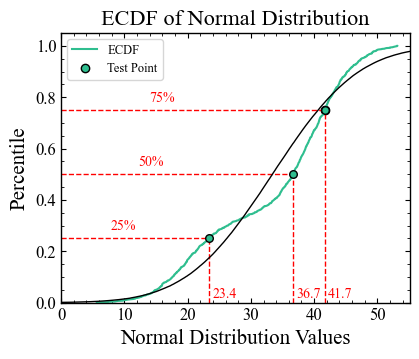

In [5]:
# a）Matplotlib中经验分布函数图的属性添加示例
import numpy as np
import pandas as pd
import seaborn as sns
from statsmodels.distributions.empirical_distribution import ECDF

plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["axes.linewidth"] = 1
plt.rcParams["axes.labelsize"] = 15
plt.rcParams["xtick.minor.visible"] = True
plt.rcParams["ytick.minor.visible"] = True
plt.rcParams["xtick.direction"] = "in"
plt.rcParams["ytick.direction"] = "in"
plt.rcParams["xtick.labelsize"] = 12
plt.rcParams["ytick.labelsize"] = 12
plt.rcParams["xtick.top"] = True
plt.rcParams["ytick.right"] = True


#生成数据
data1 = np.random.normal(loc=20, scale=5, size=400)
data2 = np.random.normal(loc=40, scale=5, size=800)
ecdf_data = np.hstack((data1, data2))

# fit a ecdf
ecdf = ECDF(ecdf_data)
fig,ax = plt.subplots(figsize=(4.5,3.5),dpi=100,facecolor="w")
ax.plot(ecdf.x, ecdf.y,color="#2FBE8F",lw=1.5,label="ECDF")
#第二条ecdf线
ecdf_full = ECDF(np.random.normal(loc = ecdf_data.mean(), 
                                        scale = ecdf_data.std(), 
                                        size = 100000))
ax.plot(ecdf_full.x,ecdf_full.y,"k",lw=1)

xs = ecdf.x
ys = ecdf.y
percent_values = [.25,.50,.75]
# 循环绘制
for p in percent_values:
    value = xs[np.where(ys > p)[0][0] - 1]
    pvalue = ys[np.where(ys > p)[0][0] - 1]
    ax.scatter(value,pvalue,s=30,color="#2FBE8F",ec="k",zorder=3)
    ax.hlines(y=p, xmin=0, xmax = value,color="r",ls="--",lw=1)
    ax.text(x=value/3,y=pvalue+.05,s=f'{int(100*p)}%',color="r",va="center")
    ax.vlines(x=value, ymin=0, ymax = pvalue,color="r",ls="--",lw=1)
    ax.text(x = value+.5, y = 0.02,s = f'{value:.1f}',color="r",ha="left")

ax.scatter(value,pvalue,color="#2FBE8F",ec="k",label="Test Point")
ax.set_xlim(0,max(ecdf_data)+2)
ax.set_ylim(0,1.05)
ax.set_ylabel('Percentile')
ax.set_xlabel('Normal Distribution Values')
ax.set_title('ECDF of Normal Distribution',fontsize=16)
ax.legend(fontsize=9)
plt.show() 

# 误差线

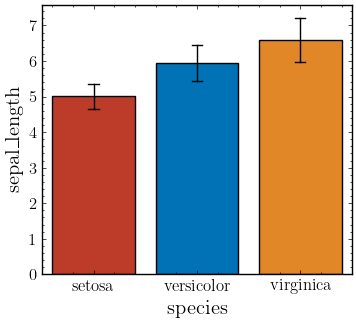

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from scipy.stats import ttest_ind

# 设定matplotlib参数
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["axes.linewidth"] = 1
plt.rcParams["axes.labelsize"] = 15
plt.rcParams["xtick.minor.visible"] = True
plt.rcParams["ytick.minor.visible"] = True
plt.rcParams["xtick.direction"] = "in"
plt.rcParams["ytick.direction"] = "in"
plt.rcParams["xtick.labelsize"] = 12
plt.rcParams["ytick.labelsize"] = 12
plt.rcParams["xtick.top"] = True
plt.rcParams["ytick.right"] = True

# 假设有一个iris数据集
iris = sns.load_dataset("iris")  # 使用seaborn内置的鸢尾花数据集

# 自定义颜色
palette = ["#BC3C29FF", "#0072B5FF", "#E18727FF"]

# 绘制柱状图
fig, ax = plt.subplots(figsize=(4, 3.5), dpi=100, facecolor="w")
sns.barplot(x="species", y="sepal_length", data=iris, palette=palette,
            estimator=np.mean, ci="sd", capsize=.1, errwidth=1, errcolor="k",
            saturation=1, edgecolor="k", linewidth=1, ax=ax)

x1, x2 = 0, 1  # 柱子的位置
y, h = max(mean_setosa, mean_versicolor) + 0.2, 0.2  # 线的高度位置和额外高度

plt.show()

# 山脊图

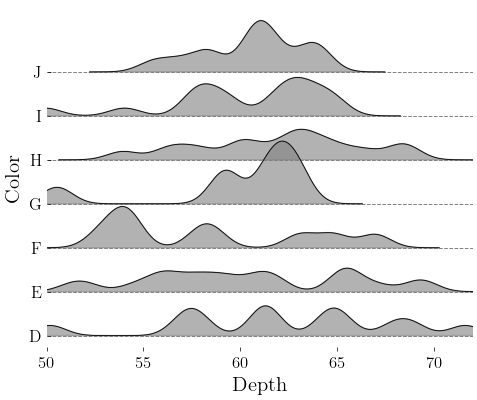

In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from KDEpy import NaiveKDE

# 设置图形风格参数
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["axes.linewidth"] = 1
plt.rcParams["axes.labelsize"] = 15
plt.rcParams["xtick.minor.visible"] = True
plt.rcParams["ytick.minor.visible"] = True
plt.rcParams["xtick.direction"] = "in"
plt.rcParams["ytick.direction"] = "in"
plt.rcParams["xtick.labelsize"] = 12
plt.rcParams["ytick.labelsize"] = 12
plt.rcParams["xtick.top"] = True
plt.rcParams["ytick.right"] = True

# 数据准备（确保 color 和 depth 数组长度相同）
colors = ['E', 'E', 'I', 'J', 'J', 'I', 'H', 'E', 'H', 'J', 'J', 'F', 'J', 'E', 'E', 'I', 'J', 'J', 'J',
          'I', 'E', 'H', 'J', 'J', 'G', 'I', 'J', 'D', 'F', 'F', 'F', 'E', 'E', 'D', 'F', 'E', 'H', 'D', 'I',
          'I', 'J', 'D', 'D', 'H', 'F', 'H', 'H', 'E', 'H', 'F', 'G', 'I', 'E', 'D', 'I', 'J', 'I', 'I', 'I',
          'I', 'D', 'D', 'D', 'I', 'G', 'I', 'G', 'G', 'E', 'D', 'H', 'H', 'H', 'H', 'F', 'E', 'D', 'D', 'E',
          'E', 'D', 'E', 'I', 'E', 'G', 'H', 'H', 'H', 'I', 'E', 'E', 'G', 'E', 'G', 'E', 'F', 'F', 'E', 'H']
depths = np.random.normal(60, 5, len(colors))  # 生成与 colors 数组长度相匹配的 depth 数据
group_data = pd.DataFrame({'color': colors, 'depth': depths})
sorted_index = sorted(set(group_data['color']), key=str.lower)

# 绘图
fig, ax = plt.subplots(figsize=(5.5, 4.5), dpi=100, facecolor="w")
for i, index in enumerate(sorted_index):
    data = group_data[group_data["color"] == index]["depth"].values
    x, y = NaiveKDE(kernel="Gaussian", bw=.8).fit(data).evaluate()
    ax.plot(x, 6 * y + i, lw=.6, color="k", zorder=100 - i)
    ax.fill(x, 6 * y + i, color="gray", alpha=.6, zorder=100 - i)

ax.grid(which="major", axis="y", ls="--", lw=.7, color="gray", zorder=-1)
ax.set_xlim(50, 72)
ax.yaxis.set_tick_params(labelleft=True)
ax.set_yticks(np.arange(len(sorted_index)))
ax.set_yticklabels(sorted_index)
ax.set_xlabel("Depth")
ax.set_ylabel("Color")
ax.tick_params(which="both", top=False, right=False)
ax.tick_params(which="minor", axis="both", left=False, bottom=False)
for spin in ["top", "right", "bottom", "left"]:
    ax.spines[spin].set_visible(False)  # 正确使用 set_visible 方法

plt.show()

# 山脊图渐变

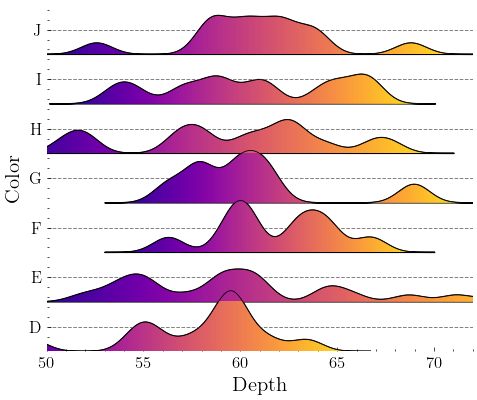

In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from KDEpy import NaiveKDE
from matplotlib.patches import PathPatch
from matplotlib.path import Path

plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["axes.linewidth"] = 1
plt.rcParams["axes.labelsize"] = 15
plt.rcParams["xtick.minor.visible"] = True
plt.rcParams["ytick.minor.visible"] = True
plt.rcParams["xtick.direction"] = "in"
plt.rcParams["ytick.direction"] = "in"
plt.rcParams["xtick.labelsize"] = 12
plt.rcParams["ytick.labelsize"] = 12
plt.rcParams["xtick.top"] = True
plt.rcParams["ytick.right"] = True

# 数据准备
colors = ['E', 'E', 'I', 'J', 'J', 'I', 'H', 'E', 'H', 'J', 'J', 'F', 'J', 'E', 'E', 'I', 'J', 'J', 'J',
          'I', 'E', 'H', 'J', 'J', 'G', 'I', 'J', 'D', 'F', 'F', 'F', 'E', 'E', 'D', 'F', 'E', 'H', 'D', 'I',
          'I', 'J', 'D', 'D', 'H', 'F', 'H', 'H', 'E', 'H', 'F', 'G', 'I', 'E', 'D', 'I', 'J', 'I', 'I', 'I',
          'I', 'D', 'D', 'D', 'I', 'G', 'I', 'G', 'G', 'E', 'D', 'H', 'H', 'H', 'H', 'F', 'E', 'D', 'D', 'E',
          'E', 'D', 'E', 'I', 'E', 'G', 'H', 'H', 'H', 'I', 'E', 'E', 'G', 'E', 'G', 'E', 'F', 'F', 'E', 'H']
depths = np.random.normal(60, 5, len(colors))
group_data = pd.DataFrame({'color': colors, 'depth': depths})
sorted_index = sorted(set(group_data['color']), key=str.lower)

fig, ax = plt.subplots(figsize=(5.5, 4.5), dpi=100, facecolor="w")
for i, index in enumerate(sorted_index):
    data = group_data[group_data["color"] == index]["depth"].values
    x, y = NaiveKDE(kernel="Gaussian", bw=.8).fit(data).evaluate()
    y_scaled = 6 * y + i
    ax.plot(x, y_scaled, lw=.6, color="k", zorder=100 - i)
    
    # Create a clip path that conforms to the line plot
    vertices = np.array([x, y_scaled]).T
    vertices = np.vstack([[x[0], i], vertices, [x[-1], i]])
    codes = [Path.MOVETO] + [Path.LINETO] * (len(x) - 1) + [Path.LINETO] + [Path.CLOSEPOLY]
    clip_path = PathPatch(Path(vertices, codes), transform=ax.transData)

    # Add gradient fill using imshow
    img_data = np.linspace(0, 1, len(x)).reshape(1, -1)
    im = ax.imshow(img_data, aspect='auto', cmap="plasma", extent=[x.min(), x.max(), i, i + 1], zorder=99 - i)
    im.set_clip_path(clip_path)
    ax.add_patch(clip_path)

ax.grid(which="major", axis="y", ls="--", lw=.7, color="gray", zorder=-1)
ax.set_xlim(50, 72)
ax.set_ylim(0, len(sorted_index))
ax.set_yticks(np.arange(len(sorted_index)) + 0.5)
ax.set_yticklabels(sorted_index)
ax.set_xlabel("Depth")
ax.set_ylabel("Color")
ax.tick_params(which="both", top=False, right=False)
for spin in ["top", "right", "bottom", "left"]:
    ax.spines[spin].set_visible(False)

plt.show()

# 高级小提琴

Fitting KDE with Scott's Factor: 0.315
Fitting KDE with Scott's Factor: 0.307
Independent t-test P-value: 0.461


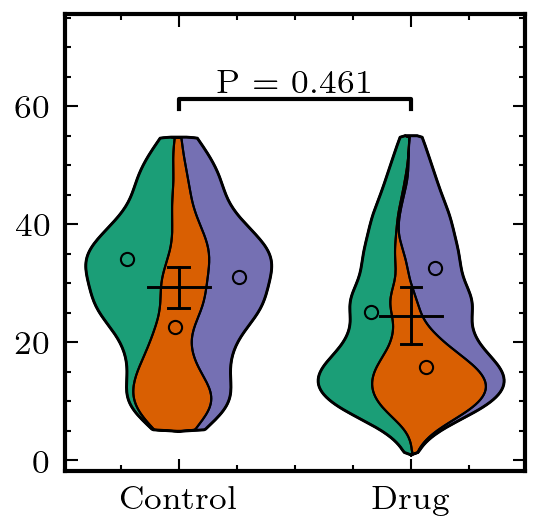

In [70]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from superviolin import test_plot,plot
from superviolin.plot import Superviolin

plt.rcParams["figure.facecolor"] = "w"
plt.rcParams["axes.spines.right"] = True
plt.rcParams["axes.spines.top"] = True
plt.rcParams['text.usetex'] = True

file_name = r"demo_data.csv"
violin = Superviolin(filename=file_name,condition="drug",value="variable",dpi=100,cmap="Dark2",
                    linewidth=0.7,return_stats=True,stats_on_plot="yes")
violin.generate_plot()

plt.show()

# 雨云图

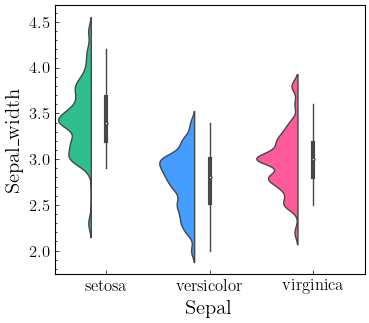

In [71]:
import pandas as pd
import numpy as np
import ptitprince as pt # 需要单独安装
import seaborn as sns
from scipy import stats 
import matplotlib.pyplot as plt

plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["axes.linewidth"] = .8
plt.rcParams["axes.labelsize"] = 15
plt.rcParams["xtick.minor.visible"] = False
plt.rcParams["ytick.minor.visible"] = True
plt.rcParams["xtick.direction"] = "in"
plt.rcParams["ytick.direction"] = "in"
plt.rcParams["xtick.labelsize"] = 12
plt.rcParams["ytick.labelsize"] = 12
plt.rcParams["xtick.top"] = False
plt.rcParams["ytick.right"] = False

# a）PtitPrince云雨图基本样式一

rain_data = sns.load_dataset("iris")
colors = ["#2FBE8F","#459DFF","#FF5B9B","#FFCC37","#751DFE"]

fig,ax = plt.subplots(figsize=(4,3.5),dpi=100,facecolor="w")

ax=pt.half_violinplot(x = "species", y ="sepal_width", data = rain_data, palette = colors[:3],
      bw=0.2, cut=2,scale = "area", width = 0.8, linewidth=1,inner="box",saturation=1)
ax.set_xlabel("Sepal")
ax.set_ylabel("Sepal\_width")

plt.show()

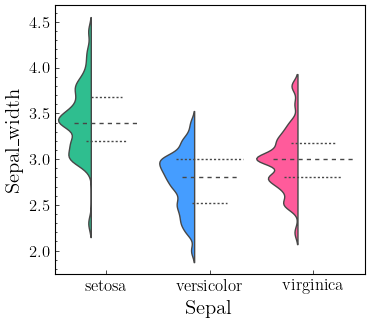

In [72]:
# b）PtitPrince云雨图基本样式二

fig,ax = plt.subplots(figsize=(4,3.5),dpi=100,facecolor="w")
ax=pt.half_violinplot(x = "species", y ="sepal_width", data = rain_data, palette = colors[:3],
      bw=0.2, cut=2,scale = "area", width = 0.8, linewidth=1,inner="quartile",saturation=1)
ax.set_xlabel("Sepal")
ax.set_ylabel("Sepal\_width")

plt.show()

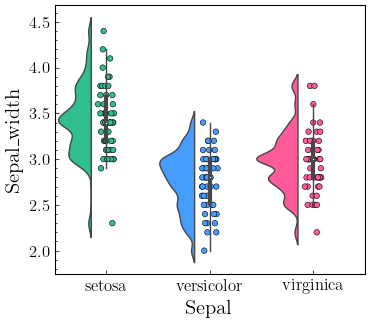

In [73]:
# c）PtitPrince云雨图基本样式三

fig,ax = plt.subplots(figsize=(4,3.5),dpi=100,facecolor="w")
ax=pt.half_violinplot(x = "species", y ="sepal_width", data = rain_data, palette = colors[:3],
      bw=0.2, cut=2,scale = "area", width = 0.8, linewidth=1,inner="box",saturation=1)

ax=sns.stripplot(x = "species", y ="sepal_width", data = rain_data, palette = colors[:3], 
                 edgecolor="k",linewidth=.4,size = 4, jitter = .08, zorder = 0,)
ax.set_xlabel("Sepal")
ax.set_ylabel("Sepal\_width")

plt.show()

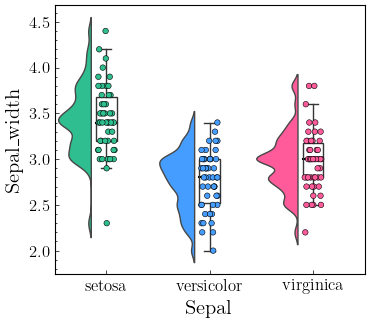

In [74]:
# d）PtitPrince云雨图基本样式四
fig,ax = plt.subplots(figsize=(4,3.5),dpi=100,facecolor="w")
ax=pt.half_violinplot(x = "species", y ="sepal_width", data = rain_data, palette = colors[:3],
      bw=0.2, cut=2,scale = "area", width = 0.8, linewidth=1,inner=None,saturation=1)
ax=sns.stripplot(x = "species", y ="sepal_width", data = rain_data, palette = colors[:3], 
                 edgecolor="k",linewidth=.4,size = 4, jitter = .08, zorder = 5,)
ax=sns.boxplot(x = "species", y ="sepal_width", data = rain_data,width = .2,saturation = 1,
               boxprops = {'facecolor':'none', "zorder":2},
               medianprops={"color":"k","linewidth":1.5},showcaps=True,showfliers=False,zorder=0)
ax.set_xlabel("Sepal")
ax.set_ylabel("Sepal\_width")

plt.show()

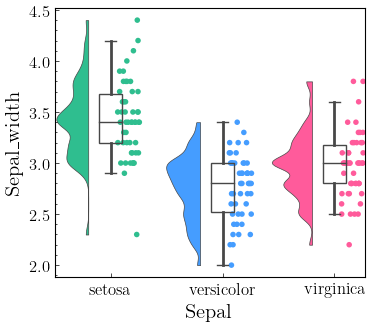

In [75]:
# e）RainCloud()函数绘制的云雨图并排组合样式一
fig,ax = plt.subplots(figsize=(4,3.5),dpi=100,facecolor="w")
ax=pt.RainCloud(x = "species", y ="sepal_width", data = rain_data, palette = colors[:3],
                width_viol =.72,width_box=.2,move=.16,saturation = 1,linewidth=.5,box_showfliers=False,
                box_linewidth =1,point_size=4,ax=ax)
ax.set_xlabel("Sepal")
ax.set_ylabel("Sepal\_width")

plt.show()

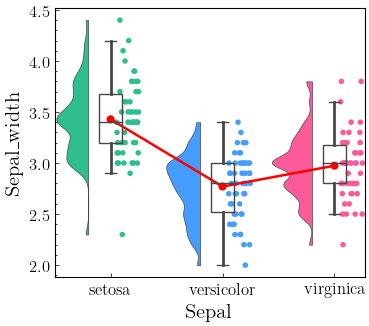

In [77]:
#  f）RainCloud()函数绘制的云雨图并排组合样式二

fig,ax = plt.subplots(figsize=(4,3.5),dpi=100,facecolor="w")
ax=pt.RainCloud(x = "species", y ="sepal_width", data = rain_data, palette = colors[:3],
                width_viol =.72,width_box=.2,move=.15,saturation = 1,linewidth=.5,box_showfliers=False,
                box_linewidth =1,point_size=4,pointplot = True,
                ax=ax)
ax.set_xlabel("Sepal")
ax.set_ylabel("Sepal\_width")

plt.show()

# 相关性散点图

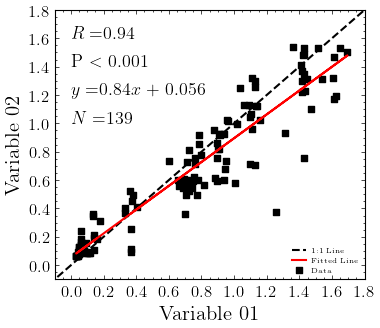

In [81]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["axes.linewidth"] = .8
plt.rcParams["axes.labelsize"] = 15
plt.rcParams["xtick.minor.visible"] = True
plt.rcParams["ytick.minor.visible"] = True
plt.rcParams["xtick.direction"] = "in"
plt.rcParams["ytick.direction"] = "in"
plt.rcParams["xtick.labelsize"] = 12
plt.rcParams["ytick.labelsize"] = 12
plt.rcParams["xtick.top"] = True
plt.rcParams["ytick.right"] = True


scatter_data = pd.read_excel(r"散点图样例数据2.xlsx")

# a）Matplotlib 相关性散点图完善示例

from scipy import stats

x = scatter_data["values"]
y = scatter_data["pred values"]
z = scatter_data["3_value"].values
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
slope, intercept, r_value, p_value, std_err

#绘制最佳拟合线
best_line_x = np.linspace(-10,10)
best_line_y=best_line_x
#绘制拟合线
y3 = slope*x + intercept

fig,ax = plt.subplots(figsize=(4,3.5),dpi=100,facecolor="w")
scatter = ax.scatter(x=x,y=y,edgecolor=None, c='k', s=13,marker='s',label="Data")
bestline = ax.plot(best_line_x,best_line_y,color='k',linewidth=1.5,linestyle='--',label="1:1 Line")
linreg = ax.plot(x,y3,color='r',linewidth=1.5,linestyle='-',label="Fitted Line")
ax.set_xlim((-.1, 1.8))
ax.set_ylim((-.1, 1.8))
ax.set_xticks(np.arange(0, 2, step=0.2))
ax.set_yticks(np.arange(0, 2, step=0.2))

# 添加文本信息
fontdict = {"size":13,"fontstyle":"italic"}
ax.text(0.,1.6,r'$R=$'+str(round(r_value,2)),fontdict=fontdict)
ax.text(0.,1.4,"P $<$ "+str(0.001),fontdict=fontdict)
ax.text(0.,1.2,r'$y=$'+str(round(slope,3))+'$x$'+" + "+str(round(intercept,3)),fontdict=fontdict)
ax.text(0.,1.0,r'$N=$'+ str(len(x)),fontdict=fontdict)

ax.set_xlabel("Variable 01")
ax.set_ylabel("Variable 02")
ax.legend(loc="lower right")

plt.show()

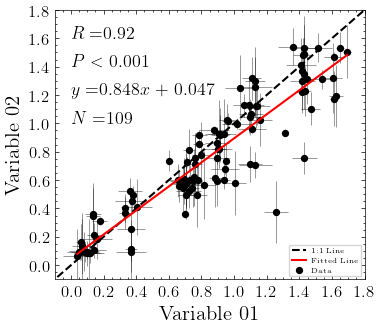

In [84]:
# d）SciencePlots 相关性（误差）散点图绘制示例
from scipy import stats
import numpy as np
from sklearn.metrics import mean_squared_error

plt.style.use('science') # 设置全局绘图样式

data_err = pd.read_excel(r"散点图样例数据2.xlsx",sheet_name="data02")

x = data_err["values"]
y = data_err["pred values"]
x_err = data_err["x_error"]
y_err = data_err["y_error"]
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
rmse = np.sqrt(mean_squared_error(x,y))
#绘制1:1拟合线
best_line_x = np.linspace(-10,10)
best_line_y=best_line_x
#绘制拟合线
y3 = slope*x + intercept
#开始绘图
fig,ax = plt.subplots(figsize=(4,3.5),dpi=100,facecolor="w")
scatter = ax.scatter(x=x,y=y,edgecolor=None, c='k', s=18,label="Data")
bestline = ax.plot(best_line_x,best_line_y,color='k',linewidth=1.5,linestyle='--',label="1:1 Line")
linreg = ax.plot(x,y3,color='r',linewidth=1.5,linestyle='-',label="Fitted Line")
# 添加误差
errorbar = ax.errorbar(x,y,xerr=x_err,yerr=y_err,ecolor="k", elinewidth=.4,capsize=0,alpha=.7,
            linestyle="",mfc="none",mec="none",zorder=-1)
ax.set_xlim((-.1, 1.8))
ax.set_ylim((-.1, 1.8))
ax.set_xticks(np.arange(0, 2, step=0.2))
ax.set_yticks(np.arange(0, 2, step=0.2))
# 添加文本信息
fontdict = {"size":13,"fontstyle":"italic"}
ax.text(0.,1.6,r'$R=$'+str(round(r_value,2)),fontdict=fontdict)
ax.text(0.,1.4,"$P <$ "+str(0.001),fontdict=fontdict)
ax.text(0.,1.2,r'$y=$'+str(round(slope,3))+'$x$'+" + "+str(round(intercept,3)),fontdict=fontdict)
ax.text(0.,1.0,r'$N=$'+ str(len(x)),fontdict=fontdict)

ax.set_xlabel("Variable 01")
ax.set_ylabel("Variable 02")
ax.legend(loc="lower right",frameon=True)

plt.show()

# 热力图

Creating directory C:\Users\GAYhen\AppData\Local\biokit\biokit 
Creating directory C:\Users\GAYhen\AppData\Local\bioservices\bioservices 


<Figure size 400x400 with 0 Axes>

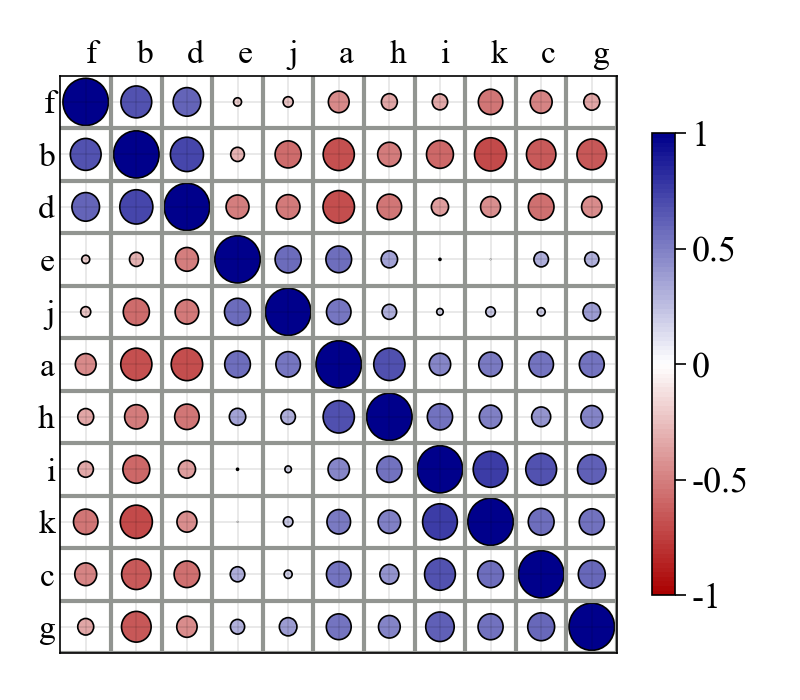

In [86]:
import pandas as pd
import numpy as np
import proplot as pplt
import seaborn as sns
from biokit.viz import corrplot #需要安装biokit库
from scipy.stats import pearsonr
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter

from proplot import rc
rc["axes.labelsize"] = 15
rc['tick.labelsize'] = 13
rc["suptitle.size"] = 15
rc["font.family"] = "Times New Roman"
rc["xtick.minor.visible"] = False
rc["ytick.minor.visible"] = False
rc["xtick.bottom"] = False
rc["ytick.left"] = False

heatmap_data = pd.read_excel(r"相关性热力图_P值.xlsx")

# a）BioKit相关性矩阵热力图（circle）

#method="circle"
c = corrplot.Corrplot(heatmap_data.corr())
fig,ax = plt.subplots(figsize=(4,3.5),dpi=100,facecolor="w")
ax = c.plot(colorbar=True, method='circle', shrink=.9,fontsize=12,rotation=0,ax=ax)
plt.show()

# 边际组合图

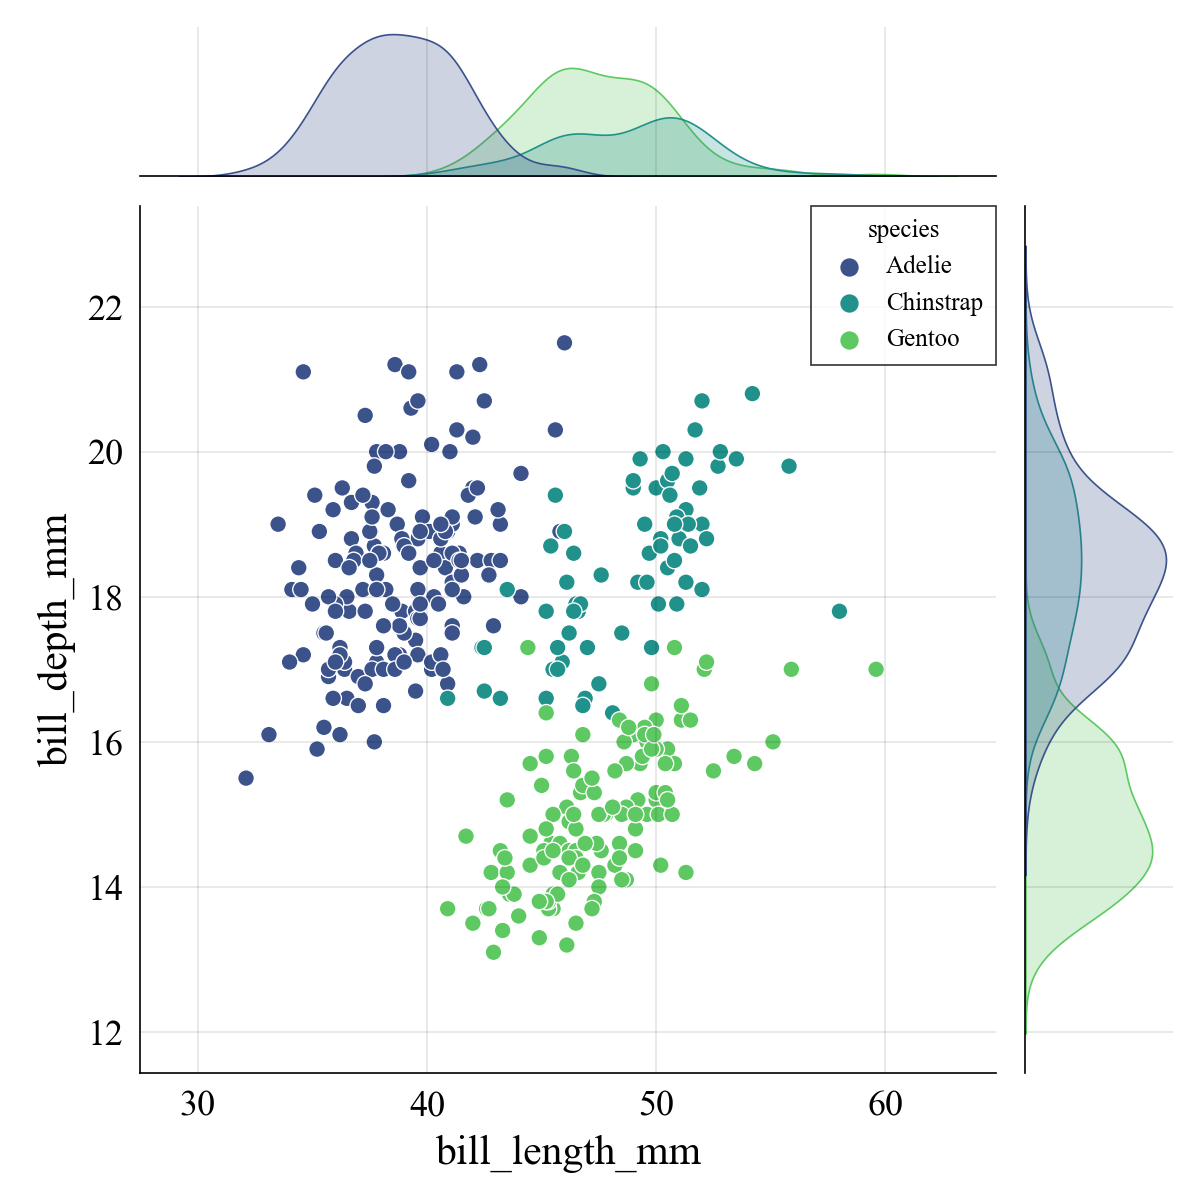

In [90]:
import pandas as pd
import numpy as np
import proplot as pplt
import seaborn as sns
from biokit.viz import corrplot  # 需要安装biokit库
from scipy.stats import pearsonr
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter

from proplot import rc
rc["axes.labelsize"] = 15
rc['tick.labelsize'] = 13
rc["suptitle.size"] = 15
rc["figure.facecolor"] = "w"
rc["font.family"] = "Times New Roman"
rc["xtick.minor.visible"] = False
rc["ytick.minor.visible"] = False
rc["xtick.bottom"] = False
rc["ytick.left"] = False

# 使用 matplotlib 的内置颜色映射 'viridis' 替代 'parula'
penguins = sns.load_dataset("penguins")
sns.jointplot(data=penguins, x="bill_length_mm", y="bill_depth_mm", 
              hue="species", palette="viridis")
plt.show()